<p>&nbsp;</p>
</p><h1 style="text-align: center;"><strong>DETEC&Ccedil;&Atilde;O AUTUMATIZADA DE FAKE NEWS</strong></h1>
<h1 style="text-align: center;"><strong>E O PROBLEMA DA LINGUAGEM OFENSIVA</strong></h1>
<p>&nbsp;</p><p>&nbsp;</p>

</p><h4 style="text-align: center;"><strong>Proposta de Tema para Trabalho de Conclusão do Curso de Especialização em Ciência de Dados.</strong></h4>

</p><h3 style="text-align: center;"><strong>Faculdade de Engenharia de Sorocaba - FACENS</strong></h3>

Proposto por:

Alex Cozer Abrantes RA:183150

Bruno Alves Comitre RA:183141

***

# Índice

<ul>
    <li><a href='#imports'>1. Imports</a></li>
    <li><a href='#recebendo_dados'>2. Recebendo Conjunto de Dados</a></li>
    <li><a href='#classificacao_variaveis'>3. Classificação da Variáveis</a></li>
    <li><a href='#dicionario_dados'>4. Dicionário dos Dados</a></li>
    <li><a href='#conjunto_dados'>5. Perfil do Conjunto de Dados</a></li>
    <li><a href='#aprendizado_deep'>6. Aprendizado de Máquina com Deep Learning</a></li>
    <ul>
        <li><a href='#resultado_deep'>6.1 Resultado</a></li>
    </ul>
    <li><a href='#testando'>7. Testando Modelo</a></li>
</ul>

<a id='imports'></a>
<h2><strong>1. Imports</strong></h2>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

<a id='recebendo_dados'></a>
<h2><strong>2. Recebendo Conjunto de Dados</strong></h2>

In [2]:
path_train = 'train.csv'

train_data = pd.read_csv(path_train, encoding='utf-8')

<a id='classificacao_variaveis'></a>
<h2><strong>3. Classifica&ccedil;&atilde;o da Vari&aacute;veis</strong></h2>

In [3]:
table = [["id","Nominal Qualitativo"],["title","Nominal Qualitativo"],
         ["author","Nominal Qualitativo"],["text","Nominal Qualitativo"],
         ["label","Quantitativo Discreto"]]

filing = pd.DataFrame(table, columns=["Variável", "Classificação"])
filing

,Variável,Classificação
0,id,Nominal Qualitativo
1,title,Nominal Qualitativo
2,author,Nominal Qualitativo
3,text,Nominal Qualitativo
4,label,Quantitativo Discreto


<a id='dicionario_dados'></a>
<h2><strong>4. Dicion&aacute;rio dos Dados</strong></h2>

- **ID:** ID exclusivo para um artigo de notícias


- **TITLE:** título de uma notícia


- **AUTHOR:** autor da notícia


- **TEXT:** texto do artigo (pode estar incompleto)


- **LABEL:** rótulo que marca se a notícia é potencialmente não confiável
 - 1: não confiável
 - 0: confiável

<a id='conjunto_dados'></a>
<h2><strong>5. Perfil do Conjunto de Dados</strong></h2>

<p>Visualizando os cinco primeiros registros</p>

In [4]:
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


<p style="text-align: justify;">Vamos criar duas novas colunas, denominadas "title_author_text" e "len_title_author_text", para armazenar a concatena&ccedil;&atilde;o do t&iacute;tulo, autor, texto e tamanho do recurso.</p>

In [5]:
train_data['title_author_text'] = train_data['title'] + ' ' + train_data['author'] + ' ' + train_data['text']
train_data['len_title_author_text'] = [len(str(x)) for x in train_data['title_author_text']]

In [6]:
detail = train_data['len_title_author_text'].describe()
print(detail)

count     20800.000000
mean       4301.178654
std        5154.196565
min           3.000000
25%        1275.000000
50%        3146.500000
75%        6186.250000
max      143053.000000
Name: len_title_author_text, dtype: float64


<a id='aprendizado_deep'></a>
<h2><strong>6. Aprendizado de Máquina com Deep Learning</strong></h2>

<p style="text-align: justify;">
No primeiro teste foi utilizado Deep Learning para treinar uma rede LSTM (Long Short Term Memory), uma variação de rede neural recorrente (RNN) utilizado em processamento de linguagem natural.
</p>
<p style="text-align: justify;">
Inicialmente o conjunto de dados foi divididos em 80% de treinamento e 20% de teste. O conjunto de dados que têm 15.848 registros, ficou 12.678 registros para treinamento e 3.170 registros para testes.
</p>
<p style="text-align: justify;">
Na tokenização das palavras, definiu-se um dicionário com no máximo 6.550 palavras, resultante valor do 3º quartil obtido na análise descritiva da feature 'len_title_author_text'. Com o auxílio do histograma na etapa de análise exploratória pôde observar a concentração da maior parte dos registros.  As sequências de entrada foram truncadas para ter o mesmo comprimento de 6.550, isso é necessário para executar o cálculo em Keras.
</p>
<p style="text-align: justify;">
O modelo terá duas camadas LSTM, sendo uma com 128 e a outra com 64 unidades de memória <b>(LSTM(128)), (LSTM(64))</b> e adicionado uma camada incorporada que utiliza 32 vetores por palavras <b>(embedding_vector_length = 32)</b>.
</p>
<p style="text-align: justify;">
A escolha de 128 e 64, se refere sobre o número de células utilizadas, pois muitas podem se desajustar e poucas podem se desajustar, então, segundo LSTM pode dar mais potência ao modelo, mas também pode super ajustá-lo. Nesse quesito a atenção é essa nova tecnologia que pode ser aplicada a uma RNN simples, pois, ajuda mais em longas cadeias de dados, como nesse estudo, onde uma RNN normal dá toda a responsabilidade de detectar o sinal para a última célula, gerando assim mais atenção as informações.
</p>
<p style="text-align: justify;">
Para o Keras realizar o treinamento com duas camadas LSTM é necessário utilizar o parâmetro <b>(return_sequences = True)</b> responsável por permitir a conectividade entre camadas LSTM.
</p>
<p style="text-align: justify;">
Como se trata de redes neurais recorrentes, geralmente têm o problema de sobreajuste (overfitting), para diminuir esse problema foi adicionado duas camadas de eliminação <b>(dropout = 0.2)</b>.
</p>
<p style="text-align: justify;">
Em nosso problema queremos descobrir se determinado texto é Confiável ou Não Confiável, ou seja, estamos diante de um problema de classificação. Para realizar as previsões 0 ou 1 para as classes (0 - Não confiável e 1 - Confiável) adicionou-se uma camada densa com 64 neurônios intermediários <b>(Dense(64, activation='relu'))</b>, e um único neurônio de saída com função de ativação sigmóide <b>(Dense(1, activation='sigmoid'))</b>. 
</p>
<p style="text-align: justify;"> 
Um intermediário totalmente conectado <b>(Dense(64))</b> pode ajudar a lidar com saídas não lineares. E uma classificação binária <b>(Dense(1))</b>, é terminada com a saída, referenciada(1,), assim sendo o fator chave para a compilação das métricas abordadas.
</p>
<p style="text-align: justify;">
As métricas utilizadas nas análises foram o logloss e acurácia e para compilação o algoritmo de otimização do ADAM <b>(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])</b>
</p>
<p style="text-align: justify;">
O treinamento será feito em 3 épocas com lote de 64 classificações para espaçar as atualizações de pesos:
</p>
<b>(X_train_seq, y_train, nb_epoch=3, batch_size=64,validation_data=(X_test_seq,y_test))</b>

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

# Corrigir seed aleatório para qualidade de reprodução
# Este método é chamado quando o RandomState é inicializado.
np.random.seed(7)

Using TensorFlow backend.


In [8]:
train_features = train_data['title_author_text']
train_targets = train_data['label']

X_train, X_test, y_train, y_test = train_test_split(train_features, train_targets, test_size=0.2, random_state=42)

print('Dados de Treino - Feature: {}'.format(len(X_train)))
print('Dados de Treino - Label: {}'.format(len(y_train)))
print(' ')
print('Dados de Teste - Feature: {}'.format(len(X_test)))
print('Dados de Teste - Label: {}'.format(len(y_test)))

Dados de Treino - Feature: 16640
Dados de Treino - Label: 16640
 
Dados de Teste - Feature: 4160
Dados de Teste - Label: 4160


In [9]:
num_token = int(detail['75%'])
token = Tokenizer(num_words = num_token, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
token.fit_on_texts(X_train.astype(str))

In [10]:
max_review_length = int(detail['75%'])

x_train_token = token.texts_to_sequences(X_train.astype(str))
x_test_token = token.texts_to_sequences(X_test.astype(str))

X_train_seq = sequence.pad_sequences(x_train_token, maxlen=max_review_length)
X_test_seq = sequence.pad_sequences(x_test_token, maxlen=max_review_length)

In [21]:
embedding_vector_length = 32
dropout = 0.3
batch_size = 64
epochs = 3

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=num_token, output_dim=embedding_vector_length, input_length=max_review_length))
model_lstm.add(LSTM(128,return_sequences=True))
model_lstm.add(Dropout(dropout))
model_lstm.add(LSTM(64))
model_lstm.add(Dropout(dropout))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(dropout))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )
print(model_lstm.summary())


history = model_lstm.fit( X_train_seq, y_train,
                         nb_epoch=epochs, batch_size=batch_size,
                         validation_data=(X_test_seq,y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 6186, 32)          197952    
_________________________________________________________________
lstm_21 (LSTM)               (None, 6186, 128)         82432     
_________________________________________________________________
dropout_27 (Dropout)         (None, 6186, 128)         0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
__________

C:\Users\cliente\Anaconda3\envs\University\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 16640 samples, validate on 4160 samples
Epoch 1/3
16640/16640 [==============================] - 5122s 308ms/step - loss: 0.4004 - acc: 0.7989 - val_loss: 0.2237 - val_acc: 0.9156
Epoch 2/3
16640/16640 [==============================] - 5209s 313ms/step - loss: 0.1676 - acc: 0.9408 - val_loss: 0.1494 - val_acc: 0.9555
Epoch 3/3
16640/16640 [==============================] - 5107s 307ms/step - loss: 0.2961 - acc: 0.8793 - val_loss: 0.1869 - val_acc: 0.9356


<p style="text-align: justify;">
No primeiro modelo temos uma camada de incorporação antes do LSTM, responsável por armazenar em um vetor as palavras de entrada.
</p>
<p style="text-align: justify;">
A primeira etapa criará uma matriz de embedding_vector_length (32) e terá a matriz max_review_length (6186).
</p>
<p style="text-align: justify;">
Na segunda etapa selecionará uma matriz correspondente de 1x32 para cada palavra.
</p>
<p style="text-align: justify;">
Agora, se considerar uma revisão (lembre-se de que agora são sequências de números), a camada de incorporação repetirá o segundo etapa para cada palavra e fornecerá uma matriz de 6186 x 32.
</p>
<p style="text-align: justify;">
Então, se considerar um conjunto de dados de treino de 16640 análises, o processo terá 16640 x 6186 x 32. Isso será alimentado na camada LSTM.
</p>
<p style="text-align: justify;">
Um modelo é treinado e o histórico de perdas é capturado.
</p>

**Serializar modelo para JSON**

In [23]:
model_json = model_lstm.to_json()
with open("model_lstm.json", "w") as json_file:
    json_file.write(model_json)

**Serializar pesos em HDF5**

In [25]:
model_lstm.save_weights("model_ltsm.h5")
print("Modelo Salvo")

Modelo Salvo


**Verificação dos Históricos**

In [26]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


**Verificação Resultados modo Gráfico**

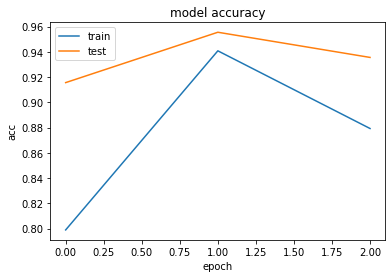

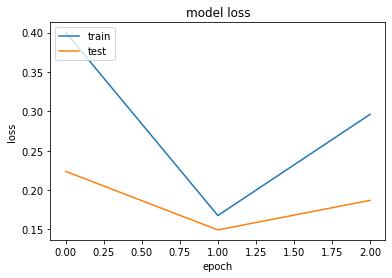

In [28]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

# resumir o histórico para precisão (accuracy)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# resumir o histórico de perda (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<a id='resultado_um'></a>
<h3><strong>6.1 Resultado</strong></h3>

In [29]:
scores = model_lstm.evaluate(X_test_seq, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.56%


<a id='testando'></a>
<h2><strong>7. Testando Modelo</strong></h2>

<p style="text-align: justify;">
Para teste da Rede Neural Recorrente, foi criado um pequeno conjunto de dados para testes, composto de 20 notícias, sendo elas 10 notícias consideradas verdades e de meios de comunicação confiáveis como CNN, The New York Times, Aljazeera, Bloomberg, Reuters, e 10 notícias vindo de sites não conhecidos, ou pouco confiáveis como, Viral Cord, The Onion, Real News Right Now, Empire News, National Report.
</p>
<p style="text-align: justify;">
Estas notícias foram retiradas do site chamado FACTITIOUS, uma plataforma de jogos, onde o desafio é através de notícias selecionadas aleatoriamente do site, o seu objetivo é acertar se elas são notícias falsas ou não, e com isso a cada vez que jogamos e a notícia que foi identificada como falsa, nós acessavamos o site e coletavamos a matéria e as informações necessárias para criar o conjunto de dados.
</p>
<p style="text-align: justify;">
Como se trata de Creative Commons, utilizamos todas as 10 noticias retiradas deste site, segue em referência para estudos futuros.
</p>
<p style="text-align: justify;">
A estrutura do conjunto de dados para teste segue abaixo:
</p>

  id  |  title  |  author  |  text  |    label    |  journal  |
----- | ------- | -------- | ------ | ----------- | --------- |
 0-20 | notícia | escritor | matéria| fake ou não |   local   |



**Recebendo Conjunto de Dados**

In [30]:
path_test = 'resources/datasets/test.csv'
test_data = pd.read_csv(path_test, header=0, encoding = 'unicode_escape',sep=';')
test_data.head()

,id,title,author,text,label,journal
0,0,Bernie Sanders had a heart attack,Deanna Hackney and Caroline Kelly,(CNN)Democratic presidential candidate Sen. Be...,0,cnn
1,1,Alabama Requires Birth Certificate To Use Publ...,Viral Cords,Alabama is the first country to enact insane b...,1,Viral Cords
2,2,Iranian Hackers Target Trump Campaign as Threa...,Nicole Perlroth and David E. Sanger,SAN FRANCISCO  The 2020 presidential election...,0,the new york times
3,3,Buckingham Palace Guards Impressed By First La...,the onion,LONDONSaying the first ladys skills were of ...,1,the onion
4,4,Los Angeles Tap Water Contains 18% Xanax and 7...,Viral Cords,In new Environmental Protection Agency (EPA) f...,1,Viral Cords


In [31]:
test_data ['title_author_text'] = test_data ['title'] + ' ' + test_data ['author'] + ' ' + test_data ['text']
test_data ['len_title_author_text'] = [len(str(x)) for x in test_data ['title_author_text']]

**Detalhes do Dataset**

In [32]:
detail = test_data['len_title_author_text'].describe()
print(detail)

count      20.000000
mean     3441.100000
std      2768.796126
min       908.000000
25%      1437.500000
50%      2155.500000
75%      4816.500000
max      9677.000000
Name: len_title_author_text, dtype: float64


**Separação**

In [33]:
X_test = test_data['title_author_text']
Y_test = test_data['label']

**Tokenização**

In [34]:
num_token = 6186
token = Tokenizer(num_words = num_token, filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
token.fit_on_texts(X_train.astype(str))

**Sequência**

In [35]:
max_review_length = 6186

X_train_token = token.texts_to_sequences(X_train.astype(str))
X_test_token = token.texts_to_sequences(X_test.astype(str))

X_train_seq = sequence.pad_sequences(X_train_token, maxlen=max_review_length)
X_test_seq = sequence.pad_sequences(X_test_token, maxlen=max_review_length)

**Utilizando Modelo**

In [36]:
from keras.models import model_from_json

json_file = open('model_lstm.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model_ltsm.h5")
print("Modelo carregado do Arquivo")

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Modelo carregado do Arquivo


**Resultado**

In [37]:
scores = loaded_model.evaluate(X_test_seq, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], scores[1]*100))

acc: 80.00%


**Predição**

In [38]:
predictions = loaded_model.predict_classes(X_test_seq)

In [39]:
print(predictions.shape)

(20, 1)


In [40]:
rounded = [np.round(x) for x in predictions]
rounded

[array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0])]

<p style="text-align: justify;">
Os dados tem a seguinte informação:
</p>

- 0 Notícia Verdadeira
- 1 Notícia Falsa


  id |   Dado do Dataset  |  Resultado do Teste  | 
 --- | ------------------ | -------------------- |
   0 |          0         |           0          |
   1 |          1         |           1          |
   2 |          0         |           0          |
   3 |          1         |           0          |
   4 |          1         |           1          |
   5 |          0         |           1          |
   6 |          1         |           1          |
   7 |          1         |           1          |
   8 |          0         |           1          |
   9 |          1         |           1          |
  10 |          1         |           1          |
  11 |          0         |           0          |
  12 |          0         |           1          |
  13 |          1         |           1          |
  14 |          0         |           0          |
  15 |          1         |           1          |
  16 |          0         |           0          |
  17 |          1         |           1          |
  18 |          0         |           0          |
  19 |          0         |           0          |
  
<p style="text-align: justify;">
Conforme visto acima obtivemos 16 acertos de 20. Um resultado satisfatório para o projeto proposto.
</p>

<h2>&nbsp;</h2>

<h2><p style="text-align: left;"><strong>REFER&Ecirc;NCIAS</strong></p></h2>

<p style="text-align: justify;">[1] UTK Machine Learning Club. Fake News - Build a system to identify unreliable news articles. 2017. Dispon&iacute;vel em: &lt;https://www.kaggle.com/c/fake-news/data.&gt;. Acesso em: 28 jul. 2019.</p>

<p style="text-align: justify;">[2] BROWNLEE, Jason. Display Deep Learning Model Training History in Keras. Dispon&iacute;vel em: &lt;https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/. Acesso em: 02 out. 2019.</p>

<p style="text-align: justify;">[3] AQUINO, Bruno. 5-fold LSTM Attention (fully commented). Dispon&iacute;vel em: &lt;https://www.kaggle.com/braquino/5-fold-lstm-attention-fully-commented-0-694/. Acesso em: 03 out. 2019.</p>

<p style="text-align: justify;">[4] AU Game Lab, the JoLT program. factitious project. Dispon&iacute;vel em: &lt;http://factitious.augamestudio.com/#/. Acesso em: 04 out. 2019.</p>

<p style="text-align: justify;">[5] SUHANKO, Djames. Como salvar um model treinado com Keras. Dispon&iacute;vel em: &lt;https://www.dobitaobyte.com.br/como-salvar-um-model-treinado-com-keras/. Acesso em: 04 out. 2019.</p>

<h2>&nbsp;</h2>

*INSTALLED VERSIONS*

In [41]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.1.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: AMD64 Family 23 Model 8 Stepping 2, AuthenticAMD
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.24.2
pytest: 5.0.1
pip: 19.1.1
setuptools: 41.0.1
Cython: None
numpy: 1.16.4
scipy: 1.2.1
pyarrow: None
xarray: None
IPython: 7.5.0
sphinx: None
patsy: None
dateutil: 2.8.0
pytz: 2019.1
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 3.1.1
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml.etree: 4.3.4
bs4: None
html5lib: None
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.10.1
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


<h2>&nbsp;</h2>

***